1. Можно ли отобрать наиболее значимые признаки с помощью PCA?

- Да, у нас же есть матрица весов W

In [15]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [16]:
# Загрузим игрушечный датасет из sklearn
iris = datasets.load_iris()
X = iris.data
X.shape

(150, 4)

In [17]:
# Для начала отмасштабируем выборку
X_ = X.astype(float)

rows, cols = X_.shape

# центрирование - вычитание из каждого значения среднего по признаку
means = X_.mean(axis=0)
for i in range(rows):
    for j in range(cols):
        X_[i, j] -= means[j]

# деление каждого значения на стандартное отклонение
std = np.std(X_, axis=0)
for j in range(cols):
    for i in range(rows):
        X_[i, j] /= std[j]

(4, 150) * (150, 4) = (4, 4)

In [18]:
# # Найдем собственные векторы и собственные значения
 
# # covariance_matrix = np.cov(X_)
# covariance_matrix = X_.T.dot(X_)

# eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

# # сформируем список кортежей (собственное значение, собственный вектор)
# eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]

# # и отсортируем список по убыванию собственных значений
# eig_pairs.sort(key=lambda x: x[0], reverse=True)

# print('Собственные значения в порядке убывания:')
# for i in eig_pairs:
#     print(i[0])

In [19]:
P, D, Q = np.linalg.svd(X_, full_matrices=False) 

In [20]:
Q

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [-0.37741762, -0.92329566, -0.02449161, -0.06694199],
       [ 0.71956635, -0.24438178, -0.14212637, -0.63427274],
       [ 0.26128628, -0.12350962, -0.80144925,  0.52359713]])

In [21]:
X_a = np.dot(np.dot(P, np.diag(D)), Q) 

In [24]:
Z = X_a.dot(Q)

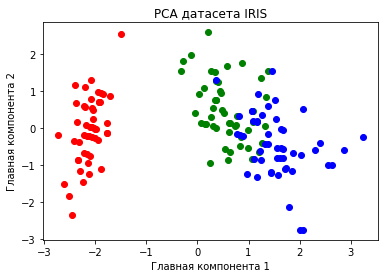

In [25]:
plt.figure()
y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Z[y==i, 0], Z[y==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()

## Домашнее задание

1. Можно ли отобрать наиболее значимые признаки с помощью PCA?
2. (\*) Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции [numpy.linalg.svd()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html)
3. (\*) Обучить любую модель классификации на датасете IRIS до применения PCA и после него. Сравнить качество классификации по отложенной выборке.
4. (\**) Принять участие в одном или двух соревнованиях и прислать свой псевдоним на Kaggle и ссылку на github с решением задачи:
    - по регрессии https://www.kaggle.com/c/tutors-expected-math-exam-results
    - или классификации https://www.kaggle.com/c/choose-tutors 
    
    В скрипте можно использовать только эти импорты:
